## Tutorial on Deep Learning Networks
Introduction to:

- MLPs: Multilayer perceptrons
- RNNs: Recurrent neural networks
- CNNs: Convolutional neural networks

**Multilayer perceptrons** or MLPs are a fully-connected network. MLPs are common in simple logistic
and linear regression problems. However, MLPs are not optimal for processing
sequential and multi-dimensional data patterns. By design, MLPs struggle to
remember patterns in sequential data and requires a substantial number of
parameters to process multi-dimensional data.

For sequential data input, **RNNs** are popular because the internal design allows
the network to discover dependency in the history of data that is useful for
prediction. For multi-dimensional data like images and videos, a **CNN** excels
in extracting feature maps for classification, segmentation, generation, and other
purposes. In some cases, a CNN in the form of a 1D convolution is also used for
networks with sequential input data. However, in most deep learning models,
MLPs, RNNs, and CNNs are combined to make the most out of each network.

## Multilayer Perceptrons

Use the famous MNIST dataset of digits

In [26]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
from glob import glob

In [27]:
#load the dataset
(x_train,y_train) , (x_test, y_test) = mnist.load_data()

#count num of unique training labels
unique, counts = np.unique(y_train,return_counts = True)
print("Train labels: ",dict(zip(unique,counts)))

#do same for test
unique,counts = np.unique(y_test,return_counts=True)
print("Test labels: ", dict(zip(unique,counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [28]:
#60000 images of shape 28x28
x_train.shape

(60000, 28, 28)

In [29]:
#sample some random digits
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]
#print(indexes)
print(images.shape)

(25, 28, 28)


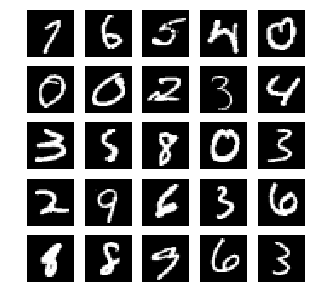

In [30]:
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()    


While MNIST data are 2D tensors, they should be reshaped accordingly
depending on the type of input layer. The following figure shows how a 3 × 3
grayscale image is reshaped for MLPs, CNNs, and RNNs input layers:

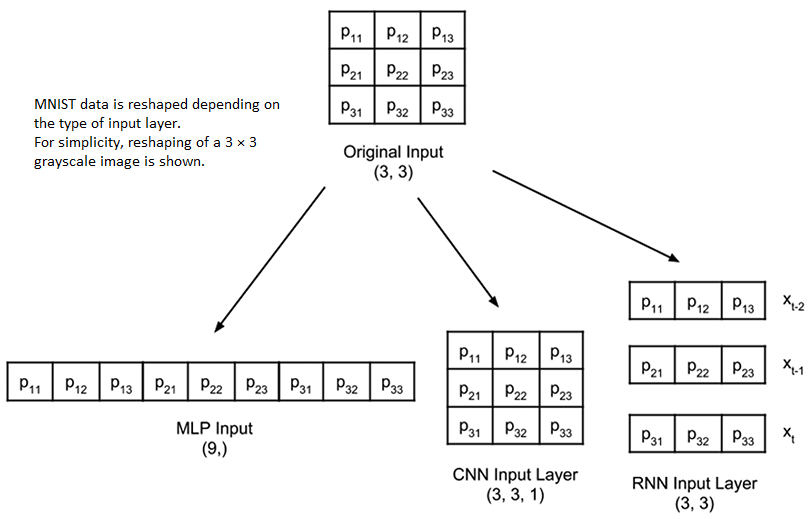

In [49]:
path = 'D:\\ml_code\\keras\\images\\blocks2.png'
Image(filename=path,width = 600,height=600)